In [171]:
import pandas as pd
from time import time
import os, sys
import json
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/Users/pratyush/Desktop/Assignments/dsf/project/venv/lib/python3.7/site-packages')

In [3]:
from pytrends.request import TrendReq

In [4]:
def getRawTrends(entityList):
    pt = TrendReq(hl='en-US', tz=360, timeout=(100,250), retries=2, backoff_factor=1.0)
    pt.build_payload(
        entityList,
        timeframe='all'
        #cat=34
    )
    return pt.interest_over_time()

def makeDataframe(entityList):
    start = time()
    curr = getRawTrends(entityList)
    timeframe = list(curr.index)
    timeList = timeframe
    moviesList = []
    trendList = []
    raw = {'movie': timeframe}
    for i in entityList:
        raw[i] = curr[i]
    df = pd.DataFrame(raw)
    df_grouped = df.groupby(df['movie'].map(lambda x: x.year)).sum()
    end = time()
    print(end - start)
    return df_grouped.T


In [30]:
def getTrends(entityList):
    n = len(entityList)
    df = pd.DataFrame()
    for i in range(0, n, 5):
        print('Getting data for movies with index from:', i)
        try:
            df = pd.concat([df, makeDataframe(entityList[i:i + 5])])
        except Exception as e:
            print('error in fetching data for movies:', entityList[i:i + 5], e)
    return df


In [6]:
df1 = pd.read_csv('tmdb_5000_movies.csv')
movieList = df1['original_title']

In [35]:
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [75]:
df1['production_house'] = df1.production_companies.apply(lambda x : json.loads(x)[0]['name'] if 'name' in x else '')
df1['genres'] = df1.genres.apply(lambda x: [i['name'] for i in x if 'name' in i])

In [77]:
df_out = df1.assign(**pd.get_dummies(df1.genres.apply(lambda x: pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))

In [82]:
df_out

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,300000000,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,250000000,http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,260000000,http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4799,9000,NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4801,0,http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],2012-05-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#df2 = getTrends([movieList[4167]])

Getting data for movies with index from: 0
error in fetching data for movies: ['Man on Wire'] The request failed: Google returned a response with code 429.


In [98]:
df_pop = pd.read_csv('popularity.csv')

Index(['Unnamed: 0', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [99]:
df = df_pop.set_index('Unnamed: 0').join(df_out.set_index('original_title'))

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
$upercapitalist,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
(500) Days of Summer,0,0,0,0,0,254,227,158,129,96,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10 Days in a Madhouse,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You,324,278,314,269,258,297,286,240,212,209,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
인천상륙작전,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"좋은 놈, 나쁜 놈, 이상한 놈",0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
친절한 금자씨,3,85,27,17,10,11,9,10,22,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
태극기 휘날리며,20,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
def accumulateGenreData(df):
    hm = {}
    genreList = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
    for genre in genreList:
        curr = pd.DataFrame(df[df[genre] > 0.0][[str(i) for i in range(2004, 2020)]].mean(), columns=['Popularity'])
        plt.plot([int(i) for i in list(curr.index)], curr.Popularity, label=genre)
    plt.legend()
    plt.show()

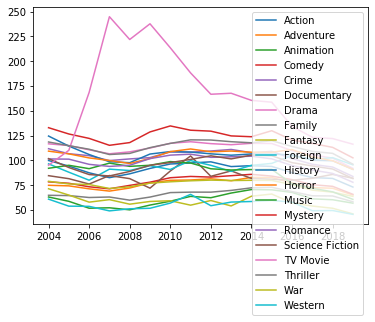

In [184]:
accumulateGenreData(df)